# Pairwise Quality Assessment - Attribute Analysis

Analyze how each method performs on different user-labeled quality attributes.

In [1]:
# Imports
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Add project root to path
sys.path.insert(0, str(Path.cwd().parent))
sys.path.insert(0, str(Path.cwd()))

from sim_bench.analysis.utils import get_project_root
from merge_pairwise_results import load_pairwise_results, merge_pairwise_results
from analyze_pairwise_by_attributes import (
    merge_results_with_labels,
    compute_accuracy_by_attribute,
    compute_accuracy_by_label_presence,
    plot_accuracy_by_majority_label,
    plot_method_performance_by_label,
)

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ Imports successful")

✓ Imports successful


## 1. Load Data

In [42]:
# Configuration
PROJECT_ROOT = get_project_root()
# BENCHMARK_DIR = PROJECT_ROOT / "outputs" / "pairwise_benchmark_3hour" / "pairwise_20251120_100520"
BENCHMARK_DIR = PROJECT_ROOT / "outputs" / "pairwise_benchmark_test" / "pairwise_20251125_004908"
# MERGED_RESULTS_PATH = BENCHMARK_DIR / "merged_pairwise_results.csv"
# LABELS_PATH = Path(r"D:\Similar Images\automatic_triage_photo_series\photo_triage_pairs_keyword_labels.csv") # Labels from key word matching
LABELS_PATH = Path(r"D:\Similar Images\automatic_triage_photo_series\reviews_df_labeled_semantic_v4.csv") # Using chatgpt
METHODS_SUMMARY = BENCHMARK_DIR / "methods_summary.csv"
print(f"Benchmark dir: {BENCHMARK_DIR}")
print(f"Results file exists: {MERGED_RESULTS_PATH.exists()}")
print(f"Labels file exists: {LABELS_PATH.exists()}")

Benchmark dir: D:\sim-bench\outputs\pairwise_benchmark_test\pairwise_20251125_004908
Results file exists: False
Labels file exists: True


In [6]:
results_dict = load_pairwise_results(BENCHMARK_DIR)

pairwise_merged = merge_pairwise_results(results_dict, include_scores=True, include_predictions=True)

Loaded CLIP-Aesthetic-LAION: 10525 pairs
Loaded CLIP-Aesthetic-Overall: 10525 pairs
Loaded CLIP-Color: 10525 pairs
Loaded CLIP-Composition: 10525 pairs
Loaded CLIP-Cropping: 10525 pairs
Loaded CLIP-Exposure: 10525 pairs
Loaded CLIP-Sharpness: 10525 pairs
Loaded CLIP-Subject-Placement: 10525 pairs
Loaded Colorfulness: 10525 pairs
Loaded Combined-RuleBased: 10525 pairs
Loaded Contrast: 10525 pairs
Loaded Exposure: 10525 pairs
Loaded NIMA-MobileNet: 10525 pairs
Loaded NIMA-ResNet50: 10525 pairs
Loaded Sharpness: 10525 pairs


In [7]:
# Load pairwise results
# pairwise_merged = pd.read_csv(MERGED_RESULTS_PATH)
print(f"Loaded pairwise results: {pairwise_merged.shape}")
print(f"Columns: {list(pairwise_merged.columns[:10])}...")
pairwise_merged.head()

Loaded pairwise results: (10525, 78)
Columns: ['pair_id', 'series_id', 'actual', 'CLIP-Aesthetic-LAION_correct', 'CLIP-Aesthetic-LAION_score_a', 'CLIP-Aesthetic-LAION_score_b', 'CLIP-Aesthetic-LAION_predicted', 'CLIP-Aesthetic-LAION_preference_strength', 'CLIP-Aesthetic-Overall_correct', 'CLIP-Aesthetic-Overall_score_a']...


,pair_id,series_id,actual,CLIP-Aesthetic-LAION_correct,CLIP-Aesthetic-LAION_score_a,CLIP-Aesthetic-LAION_score_b,CLIP-Aesthetic-LAION_predicted,CLIP-Aesthetic-LAION_preference_strength,CLIP-Aesthetic-Overall_correct,CLIP-Aesthetic-Overall_score_a,...,NIMA-ResNet50_correct,NIMA-ResNet50_score_a,NIMA-ResNet50_score_b,NIMA-ResNet50_predicted,NIMA-ResNet50_preference_strength,Sharpness_correct,Sharpness_score_a,Sharpness_score_b,Sharpness_predicted,Sharpness_preference_strength
0,1_1_2,1,A,0,0.008740,0.009979,B,0.949,0,-0.012056,...,1,5.529518,5.250878,A,0.949,1,1.000000,0.239514,A,0.949
1,1_1_3,1,A,1,0.008740,0.005241,A,0.636,1,-0.012056,...,0,5.529518,5.693427,B,0.636,0,1.000000,1.000000,B,0.636
2,1_1_4,1,A,1,0.008740,0.006140,A,0.881,1,-0.012056,...,1,5.529518,5.460539,A,0.881,1,1.000000,0.611230,A,0.881
3,1_2_3,1,B,0,0.009979,0.005241,A,0.914,0,-0.004343,...,1,5.250878,5.693427,B,0.914,1,0.239514,1.000000,B,0.914
4,1_2_4,1,B,0,0.009979,0.006140,A,0.717,0,-0.004343,...,1,5.250878,5.460539,B,0.717,1,0.239514,0.611230,B,0.717


In [43]:
df_methods_summary = pd.read_csv(METHODS_SUMMARY)

In [8]:
df_labels = pd.read_csv(LABELS_PATH)
print(df_labels.columns)
df_labels.head()

Index(['Unnamed: 0', 'series_id', 'compareID1', 'compareID2', 'reason_text',
       'label'],
      dtype='object')


,Unnamed: 0,series_id,compareID1,compareID2,reason_text,label
0,0,1,0,1,too narrow view,field_of_view
1,1,1,0,2,it is in Portrait view instead of Landscape Vi...,field_of_view
2,2,1,2,1,not interesting,subject_interest
3,3,1,3,1,"its father away, you can't see the details",detail_visibility
4,4,1,3,0,composition is great,composition


In [14]:
df_labels[['compareFile1', 'compareFile2', 'majority_label']]

,compareFile1,compareFile2,majority_label
0,1-1.JPG,1-2.JPG,composition
1,1-1.JPG,1-3.JPG,detail_visibility
2,1-1.JPG,1-4.JPG,detail_visibility
3,1-2.JPG,1-1.JPG,sharpness
4,1-2.JPG,1-3.JPG,no_specific_attribute
...,...,...,...
24181,5951-2.JPG,5951-1.JPG,no_specific_attribute
24182,5952-1.JPG,5952-2.JPG,no_specific_attribute
24183,5952-2.JPG,5952-1.JPG,lighting_quality
24184,5953-1.JPG,5953-2.JPG,detail_visibility


In [18]:
pairwise_merged.columns

Index(['pair_id', 'series_id', 'actual', 'CLIP-Aesthetic-LAION_correct',
       'CLIP-Aesthetic-LAION_score_a', 'CLIP-Aesthetic-LAION_score_b',
       'CLIP-Aesthetic-LAION_predicted',
       'CLIP-Aesthetic-LAION_preference_strength',
       'CLIP-Aesthetic-Overall_correct', 'CLIP-Aesthetic-Overall_score_a',
       'CLIP-Aesthetic-Overall_score_b', 'CLIP-Aesthetic-Overall_predicted',
       'CLIP-Aesthetic-Overall_preference_strength', 'CLIP-Color_correct',
       'CLIP-Color_score_a', 'CLIP-Color_score_b', 'CLIP-Color_predicted',
       'CLIP-Color_preference_strength', 'CLIP-Composition_correct',
       'CLIP-Composition_score_a', 'CLIP-Composition_score_b',
       'CLIP-Composition_predicted', 'CLIP-Composition_preference_strength',
       'CLIP-Cropping_correct', 'CLIP-Cropping_score_a',
       'CLIP-Cropping_score_b', 'CLIP-Cropping_predicted',
       'CLIP-Cropping_preference_strength', 'CLIP-Exposure_correct',
       'CLIP-Exposure_score_a', 'CLIP-Exposure_score_b',
       'CLI

In [19]:
pairwise_merged[['series_id', 'pair_id', 'compareID1', 'compareID2']].head(10)

,series_id,pair_id,compareID1,compareID2
0,1,1_1_2,1,2
1,1,1_1_3,1,3
2,1,1_1_4,1,4
3,1,1_2_3,2,3
4,1,1_2_4,2,4
5,1,1_3_4,3,4
6,2,2_1_2,1,2
7,2,2_1_3,1,3
8,2,2_1_4,1,4
9,2,2_1_5,1,5


In [22]:
pairwise_merged[['compareID1', 'compareID2']] = pairwise_merged['pair_id'].str.split('_', expand=True)[[1, 2]]
pairwise_merged[['compareID1', 'compareID2']] = pairwise_merged[['compareID1', 'compareID2']].astype(int)

In [9]:
df_full_labels = pd.read_csv(r'D:\Similar Images\automatic_triage_photo_series\train_val\labels_db.csv')
print(df_full_labels.columns)

df_full_labels.head()

Index(['series_id', 'compareID1', 'compareID2', 'LEFT', 'RIGHT', 'Total',
       'max_count', 'Agreement', 'MaxVote', 'num_reviewers', 'majority_label',
       'label_composition', 'label_detail_visibility',
       'label_distance_appropriateness', 'label_dynamic_range',
       'label_exposure_quality', 'label_field_of_view',
       'label_lighting_quality', 'label_motion_blur', 'label_no_reason_given',
       'label_no_specific_attribute', 'label_sharpness',
       'label_subject_interest'],
      dtype='object')


,series_id,compareID1,compareID2,LEFT,RIGHT,Total,max_count,Agreement,MaxVote,num_reviewers,...,label_distance_appropriateness,label_dynamic_range,label_exposure_quality,label_field_of_view,label_lighting_quality,label_motion_blur,label_no_reason_given,label_no_specific_attribute,label_sharpness,label_subject_interest
0,1,0,1,0,5,5,5,1.000000,1,5,...,0,0,0,1,0,0,0,0,1,1
1,1,0,2,0,4,4,4,1.000000,2,4,...,0,0,1,0,0,0,0,1,0,0
2,1,0,3,2,1,3,2,0.666667,0,3,...,0,0,0,1,0,0,0,1,0,0
3,1,1,0,1,0,1,1,1.000000,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,2,2,1,3,2,0.666667,1,3,...,0,0,0,0,0,0,0,3,0,0


In [21]:
df_labels.dtypes

Unnamed: 0      int64
series_id       int64
compareID1      int64
compareID2      int64
reason_text    object
label          object
dtype: object

In [32]:
df_labels_max_vote = df_labels.groupby(['series_id', 'compareID1', 'compareID2'])['label'].agg(
    majority_label=lambda x: x.value_counts().idxmax(),
    vote_count=lambda x: x.value_counts().max()
).reset_index()

In [35]:
combined_df = pairwise_merged.merge(df_labels_max_vote, on=['series_id',  'compareID1', 'compareID2'], how='left')


In [33]:
df_labels_max_vote.head()

,series_id,compareID1,compareID2,majority_label,vote_count
0,1,0,1,field_of_view,1
1,1,0,2,exposure_quality,2
2,1,0,3,no_specific_attribute,1
3,1,1,0,sharpness,1
4,1,1,2,subject_interest,1


In [36]:
len(pairwise_merged), len(combined_df)

(10525, 10525)

In [47]:
combined_df.columns

Index(['pair_id', 'series_id', 'actual', 'CLIP-Aesthetic-LAION_correct',
       'CLIP-Aesthetic-LAION_score_a', 'CLIP-Aesthetic-LAION_score_b',
       'CLIP-Aesthetic-LAION_predicted',
       'CLIP-Aesthetic-LAION_preference_strength',
       'CLIP-Aesthetic-Overall_correct', 'CLIP-Aesthetic-Overall_score_a',
       'CLIP-Aesthetic-Overall_score_b', 'CLIP-Aesthetic-Overall_predicted',
       'CLIP-Aesthetic-Overall_preference_strength', 'CLIP-Color_correct',
       'CLIP-Color_score_a', 'CLIP-Color_score_b', 'CLIP-Color_predicted',
       'CLIP-Color_preference_strength', 'CLIP-Composition_correct',
       'CLIP-Composition_score_a', 'CLIP-Composition_score_b',
       'CLIP-Composition_predicted', 'CLIP-Composition_preference_strength',
       'CLIP-Cropping_correct', 'CLIP-Cropping_score_a',
       'CLIP-Cropping_score_b', 'CLIP-Cropping_predicted',
       'CLIP-Cropping_preference_strength', 'CLIP-Exposure_correct',
       'CLIP-Exposure_score_a', 'CLIP-Exposure_score_b',
       'CLI

In [37]:
# Merge with user attribute labels

# Get method names
pairwise_methods = [col.replace('_correct', '') for col in combined_df.columns if col.endswith('_correct')]

print(f"\nMerged data shape: {combined_df.shape}")
print(f"Pairs with labels: {len(combined_df)} ({len(combined_df)/len(pairwise_merged)*100:.1f}% coverage)")
print(f"\nMethods: {', '.join(pairwise_methods)}")


Merged data shape: (10525, 82)
Pairs with labels: 10525 (100.0% coverage)

Methods: CLIP-Aesthetic-LAION, CLIP-Aesthetic-Overall, CLIP-Color, CLIP-Composition, CLIP-Cropping, CLIP-Exposure, CLIP-Sharpness, CLIP-Subject-Placement, Colorfulness, Combined-RuleBased, Contrast, Exposure, NIMA-MobileNet, NIMA-ResNet50, Sharpness


## 2. Accuracy by Majority Label

Show how each method performs on different attribute categories (composition, sharpness, exposure, etc.)

In [63]:
for method in pairwise_methods:
    combined_df[method+'_max'] = combined_df[[method+'_score_a', method+'_score_b']].max(axis=1)
    combined_df[method+'_min'] = combined_df[[method+'_score_a', method+'_score_b']].min(axis=1)
    combined_df[method+'_log_ratio'] = np.log10(combined_df[method+'_max'] / combined_df[method+'_min'])
    combined_df[method+'_diff'] = combined_df[method+'_max'] - combined_df[method+'_min']

d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\sim-bench\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, m

In [57]:
summary_table = pd.DataFrame()

for method in pairwise_methods:
    mean_ratios = combined_df.groupby([method+'_correct'])[method+'_diff'].mean()
    summary_table[method] = mean_ratios

summary_table.index.name = 'correct'
summary_table.reset_index(inplace=True)
summary_table.T

,0,1
correct,0.000000,1.000000
CLIP-Aesthetic-LAION,0.004286,0.004970
CLIP-Aesthetic-Overall,0.011708,0.012758
CLIP-Color,0.009721,0.012339
CLIP-Composition,0.008800,0.009403
CLIP-Cropping,0.006052,0.006728
CLIP-Exposure,0.006219,0.007376
CLIP-Sharpness,0.009316,0.012328
CLIP-Subject-Placement,0.004824,0.005820
Colorfulness,0.056640,0.068261


In [50]:
summary_table = pd.DataFrame()

for method in pairwise_methods:
    mean_ratios = combined_df.groupby([method+'_correct'])[method+'_ratio'].mean()
    summary_table[method] = mean_ratios

summary_table.index.name = 'correct'
summary_table.reset_index(inplace=True)
summary_table.T

,0,1
correct,0.000000,1.000000
CLIP-Aesthetic-LAION,2.364282,0.564309
CLIP-Aesthetic-Overall,-21.261275,-8.499371
CLIP-Color,2.308473,0.376986
CLIP-Composition,0.660256,0.568373
CLIP-Cropping,0.945840,-0.269102
CLIP-Exposure,1.581374,0.959936
CLIP-Sharpness,0.727579,0.103136
CLIP-Subject-Placement,1.084704,0.767165
Colorfulness,inf,inf


In [68]:
list(combined_df.columns)[-40:]

['Exposure_ratio',
 'NIMA-MobileNet_max',
 'NIMA-MobileNet_min',
 'NIMA-MobileNet_ratio',
 'NIMA-ResNet50_max',
 'NIMA-ResNet50_min',
 'NIMA-ResNet50_ratio',
 'Sharpness_max',
 'Sharpness_min',
 'Sharpness_ratio',
 'CLIP-Aesthetic-LAION_diff',
 'CLIP-Aesthetic-Overall_diff',
 'CLIP-Color_diff',
 'CLIP-Composition_diff',
 'CLIP-Cropping_diff',
 'CLIP-Exposure_diff',
 'CLIP-Sharpness_diff',
 'CLIP-Subject-Placement_diff',
 'Colorfulness_diff',
 'Combined-RuleBased_diff',
 'Contrast_diff',
 'Exposure_diff',
 'NIMA-MobileNet_diff',
 'NIMA-ResNet50_diff',
 'Sharpness_diff',
 'CLIP-Aesthetic-LAION_log_ratio',
 'CLIP-Aesthetic-Overall_log_ratio',
 'CLIP-Color_log_ratio',
 'CLIP-Composition_log_ratio',
 'CLIP-Cropping_log_ratio',
 'CLIP-Exposure_log_ratio',
 'CLIP-Sharpness_log_ratio',
 'CLIP-Subject-Placement_log_ratio',
 'Colorfulness_log_ratio',
 'Combined-RuleBased_log_ratio',
 'Contrast_log_ratio',
 'Exposure_log_ratio',
 'NIMA-MobileNet_log_ratio',
 'NIMA-ResNet50_log_ratio',
 'Sharpness

In [73]:
combined_df[method+'_correct'].astype(str)

0        1
1        0
2        1
3        1
4        1
        ..
10520    0
10521    0
10522    1
10523    0
10524    1
Name: Sharpness_correct, Length: 10525, dtype: object

In [70]:
import fivecentplots as fcp

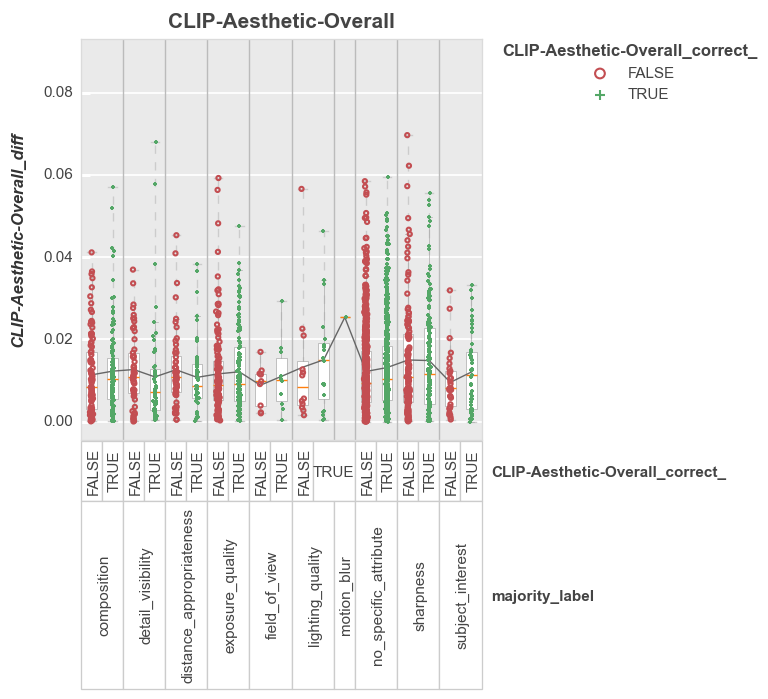

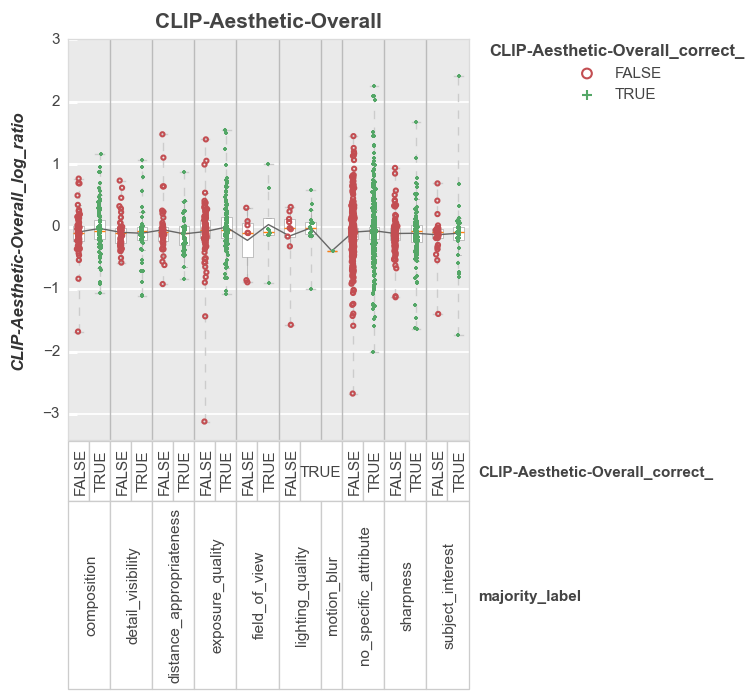

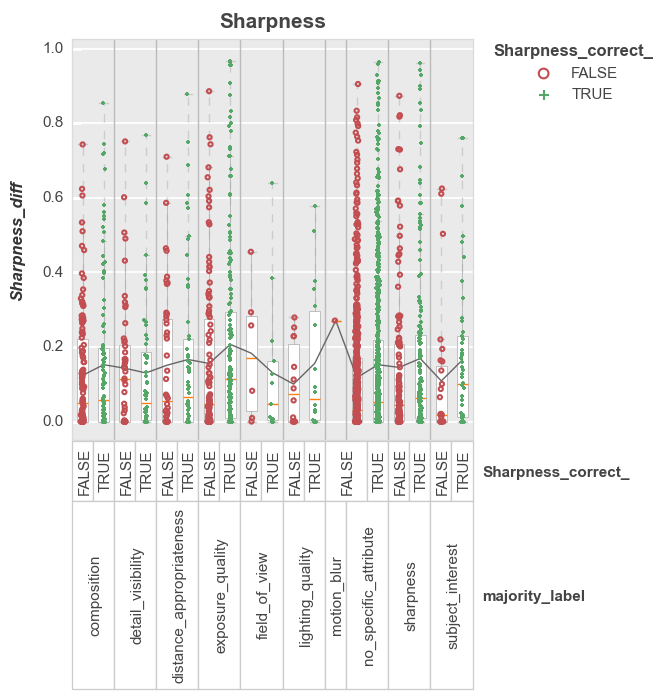

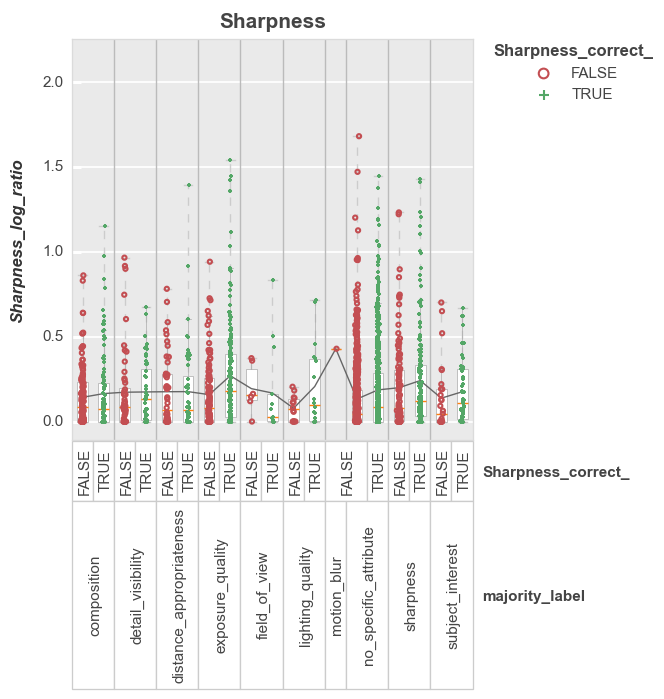

In [75]:
for method in ['CLIP-Aesthetic-Overall', 'Sharpness']:
    combined_df[method+'_correct_'] = np.where(combined_df[method+'_correct'] == 1, 'TRUE', 'FALSE')
    g1 = fcp.boxplot(df=combined_df, y=method+'_diff', groups=['majority_label', method+'_correct_'],
                title=method, legend=method+'_correct_')

    g1 = fcp.boxplot(df=combined_df, y=method+'_log_ratio', groups=['majority_label', method+'_correct_'],
                title=method, legend=method+'_correct_')
    # g2 = sns.relplot(data=combined_df, x=method+'_min', y=method+'_max', hue=method+'_correct')
    # g2.fig.suptitle(method)
    # g2.fig.tight_layout()

In [38]:
# Compute accuracy by majority label
majority_label_accuracy = compute_accuracy_by_attribute(combined_df, pairwise_methods, 'majority_label')

print("Method Accuracy by User-Labeled Attribute:")
print("="*80)
display(majority_label_accuracy.sort_values('count', ascending=False))

Method Accuracy by User-Labeled Attribute:


,attribute,value,count,CLIP-Aesthetic-LAION_accuracy,CLIP-Aesthetic-Overall_accuracy,CLIP-Color_accuracy,CLIP-Composition_accuracy,CLIP-Cropping_accuracy,CLIP-Exposure_accuracy,CLIP-Sharpness_accuracy,CLIP-Subject-Placement_accuracy,Colorfulness_accuracy,Combined-RuleBased_accuracy,Contrast_accuracy,Exposure_accuracy,NIMA-MobileNet_accuracy,NIMA-ResNet50_accuracy,Sharpness_accuracy
7,majority_label,no_specific_attribute,1342,0.559613,0.526080,0.594635,0.524590,0.543219,0.581967,0.596125,0.587928,0.555142,0.570790,0.484352,0.583458,0.508942,0.505216,0.544709
8,majority_label,sharpness,288,0.607639,0.569444,0.600694,0.562500,0.538194,0.649306,0.638889,0.586806,0.500000,0.600694,0.489583,0.583333,0.465278,0.527778,0.611111
3,majority_label,exposure_quality,283,0.593640,0.533569,0.614841,0.522968,0.501767,0.611307,0.636042,0.600707,0.653710,0.643110,0.445230,0.660777,0.491166,0.530035,0.625442
0,majority_label,composition,230,0.569565,0.569565,0.613043,0.547826,0.552174,0.604348,0.591304,0.578261,0.517391,0.513043,0.500000,0.582609,0.495652,0.482609,0.469565
1,majority_label,detail_visibility,108,0.444444,0.509259,0.435185,0.518519,0.472222,0.472222,0.657407,0.537037,0.518519,0.509259,0.398148,0.518519,0.490741,0.490741,0.518519
2,majority_label,distance_appropriateness,108,0.490741,0.518519,0.601852,0.509259,0.537037,0.555556,0.620370,0.518519,0.537037,0.592593,0.490741,0.564815,0.416667,0.490741,0.592593
9,majority_label,subject_interest,79,0.582278,0.620253,0.670886,0.556962,0.556962,0.658228,0.607595,0.683544,0.506329,0.683544,0.569620,0.620253,0.455696,0.518987,0.658228
5,majority_label,lighting_quality,32,0.625000,0.625000,0.625000,0.562500,0.562500,0.593750,0.625000,0.625000,0.562500,0.500000,0.500000,0.593750,0.500000,0.593750,0.562500
4,majority_label,field_of_view,19,0.526316,0.526316,0.368421,0.578947,0.631579,0.631579,0.526316,0.736842,0.526316,0.736842,0.789474,0.526316,0.473684,0.473684,0.684211
6,majority_label,motion_blur,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


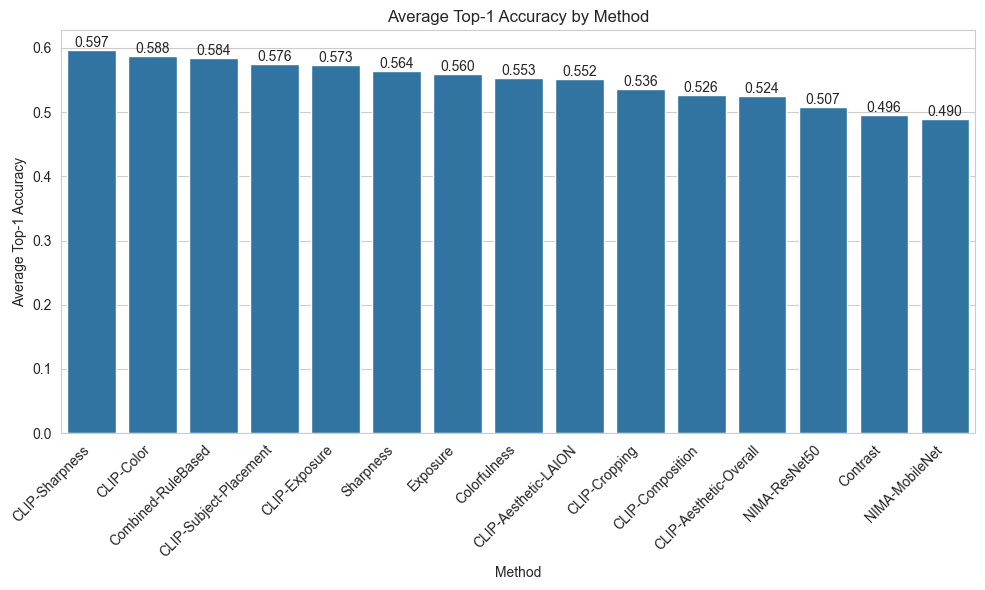

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_methods_summary, x='method', y='avg_top1_accuracy', ax=ax)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.xlabel('Method')
plt.ylabel('Average Top-1 Accuracy')
plt.title('Average Top-1 Accuracy by Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Attribute Presence Analysis

Compare performance when specific attributes are mentioned vs not mentioned

In [40]:
# Performance when specific attributes mentioned
label_cols = [col for col in combined_df.columns if col.startswith('label_') and 
              col not in ['label_no_reason_given', 'label_no_specific_attribute']]

label_presence = compute_accuracy_by_label_presence(combined_df, pairwise_methods, label_cols)

print("Accuracy when attribute PRESENT vs ABSENT:")
print("="*80)
display(label_presence.sort_values('present_count', ascending=False))

KeyError: 'present_count'

## 4. Composition Deep-Dive

In [8]:
# Composition analysis
composition_pairs = combined_df[combined_df['label_composition'] > 0]
print(f"COMPOSITION ANALYSIS ({len(composition_pairs)} pairs where 'composition' mentioned)")
print("="*80)

for method in pairwise_methods:
    correct_col = f'{method}_correct'
    comp_acc = composition_pairs[correct_col].mean()
    overall_acc = combined_df[correct_col].mean()
    diff = comp_acc - overall_acc
    
    sign = "✓" if diff > 0 else "✗" if diff < 0 else "="
    print(f"{sign} {method:25s}: {comp_acc:.3f} (overall: {overall_acc:.3f}, diff: {diff:+.3f})")

COMPOSITION ANALYSIS (234 pairs where 'composition' mentioned)
✗ CLIP-Aesthetic-LAION     : 0.500 (overall: 0.551, diff: -0.051)
✗ CLIP-LearnedPrompts      : 0.500 (overall: 0.551, diff: -0.051)
✗ Colorfulness             : 0.521 (overall: 0.591, diff: -0.069)
✓ Combined-RuleBased       : 0.607 (overall: 0.589, diff: +0.018)
✓ Contrast                 : 0.491 (overall: 0.469, diff: +0.023)
✓ Exposure                 : 0.590 (overall: 0.580, diff: +0.009)
✗ Sharpness                : 0.509 (overall: 0.552, diff: -0.043)


## 5. Per-Method Visualizations

Detailed analysis for top methods


Combined-RuleBased - Performance by Attribute


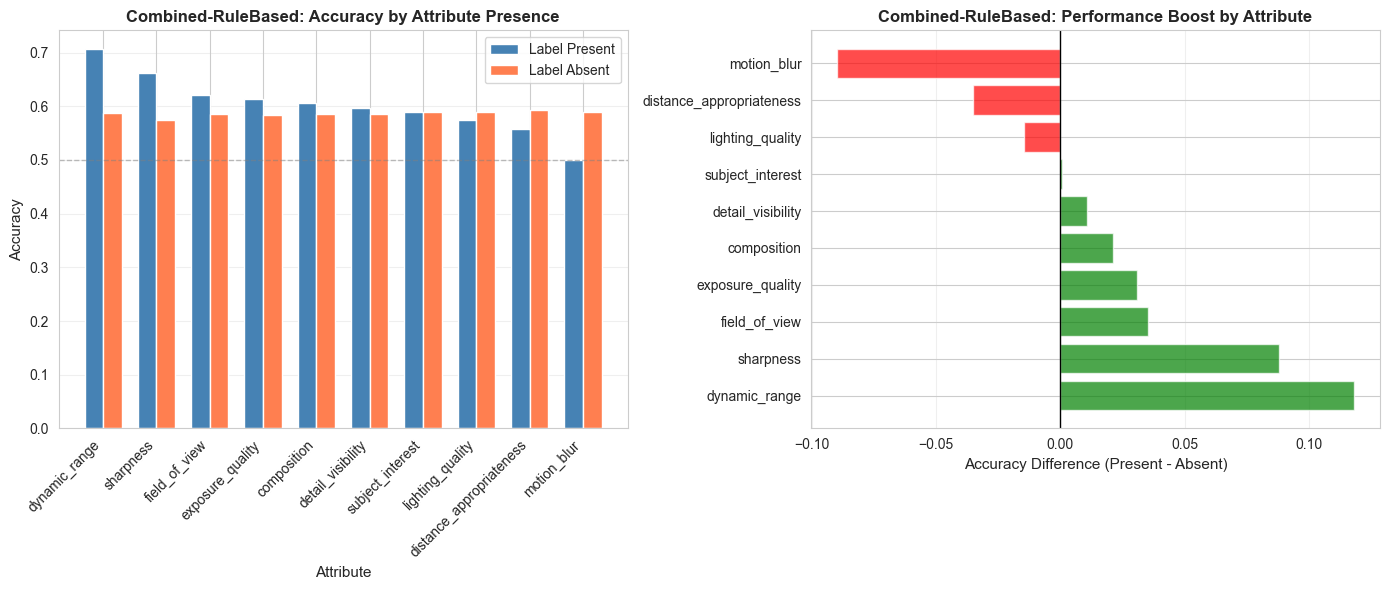


Sharpness - Performance by Attribute


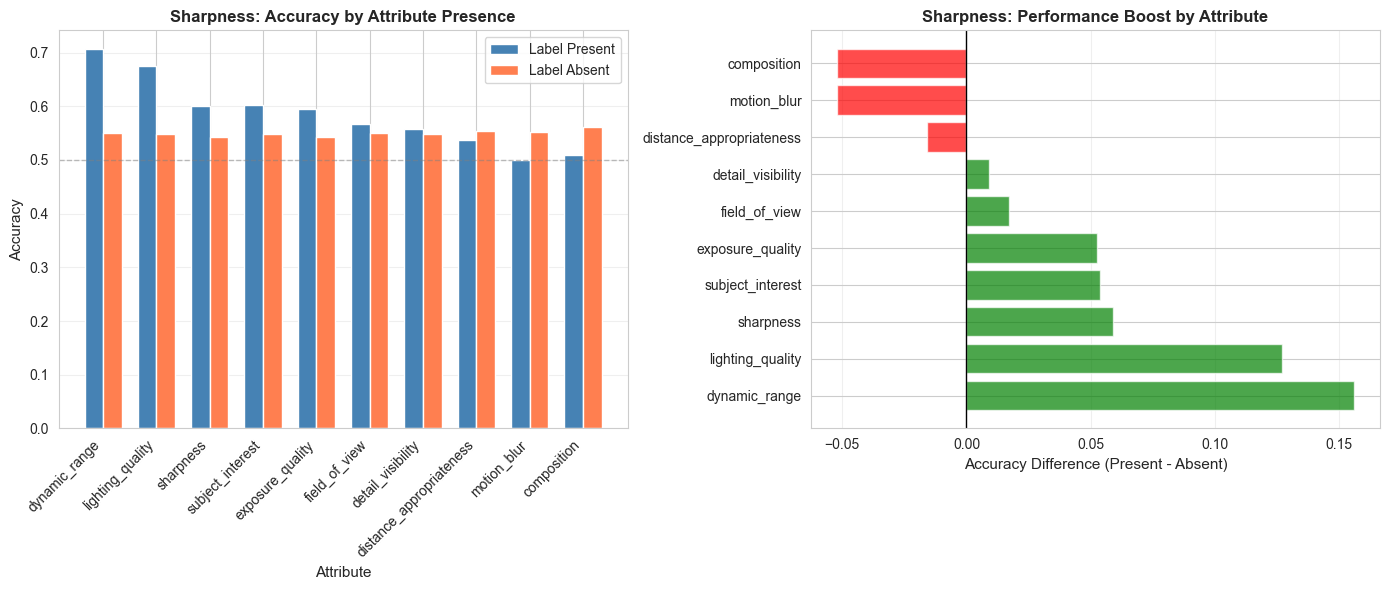


Colorfulness - Performance by Attribute


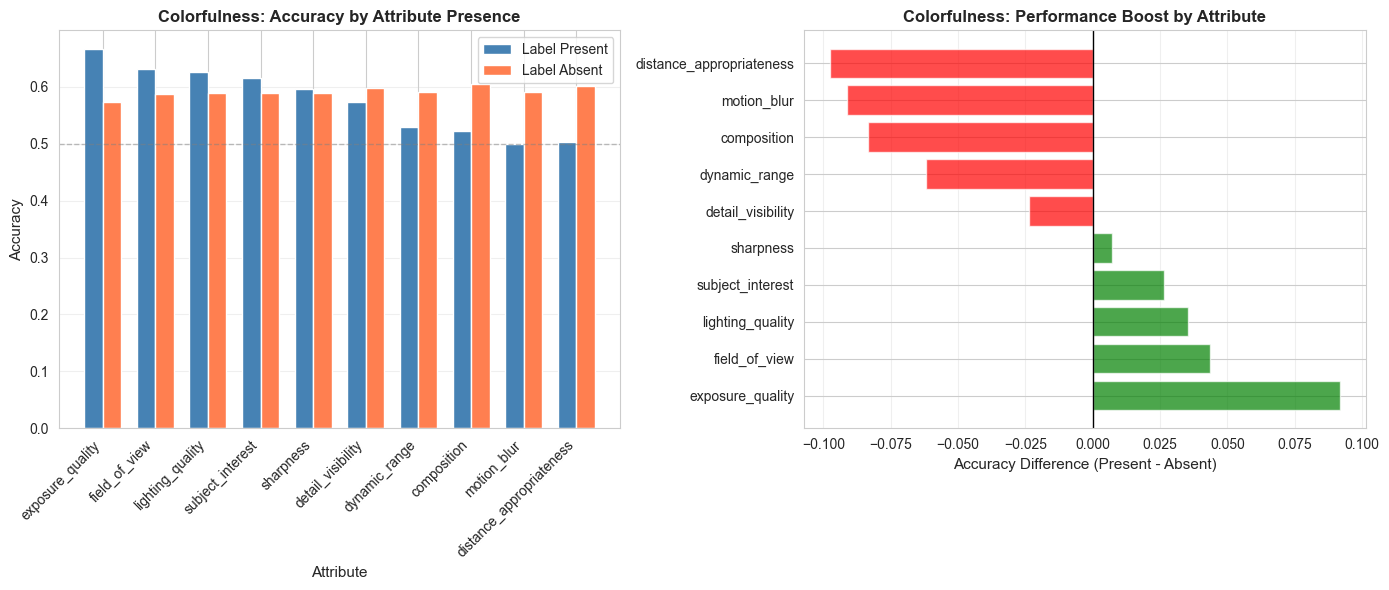

In [9]:
# Visualize top 3 methods
for method in ['Combined-RuleBased', 'Sharpness', 'Colorfulness']:
    print(f"\n{'='*80}")
    print(f"{method} - Performance by Attribute")
    print(f"{'='*80}")
    fig = plot_method_performance_by_label(label_presence, method, figsize=(14, 6))
    if fig:
        plt.show()
    else:
        print(f"Could not create visualization for {method}")